In [ ]:
# Authors: Matthew Chak, Jerry Chang, Kyle Bistrain
# Cal Poly SLO, CSC 487: Deep Learning
# https://www.kaggle.com/competitions/contradictory-my-dear-watson/overview
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plotter
import plotly.graph_objects as go

import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        strategy = tf.distribute.OneDeviceStrategy(device="/gpu:0")
    except RuntimeError as e:
        print(e)
else:
    strategy = tf.distribute.get_strategy()
    print('Number of replicas:', strategy.num_replicas_in_sync)

In [ ]:
import os
os.environ["WANDB_API_KEY"] = "0"

In [ ]:
train = pd.read_csv("../input/contradictory-my-dear-watson/train.csv")
test = pd.read_csv("../input/contradictory-my-dear-watson/test.csv")

In [ ]:
display(train.head())
display(test.head())

,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1


,id,premise,hypothesis,lang_abv,language
0,c6d58c3f69,بکس، کیسی، راہیل، یسعیاہ، کیلی، کیلی، اور کولم...,"کیسی کے لئے کوئی یادگار نہیں ہوگا, کولمین ہائی...",ur,Urdu
1,cefcc82292,هذا هو ما تم نصحنا به.,عندما يتم إخبارهم بما يجب عليهم فعله ، فشلت ال...,ar,Arabic
2,e98005252c,et cela est en grande partie dû au fait que le...,Les mères se droguent.,fr,French
3,58518c10ba,与城市及其他公民及社区组织代表就IMA的艺术发展进行对话&amp,IMA与其他组织合作，因为它们都依靠共享资金。,zh,Chinese
4,c32b0d16df,Она все еще была там.,"Мы думали, что она ушла, однако, она осталась.",ru,Russian


In [ ]:
print('train')
display(train.info())
print('----------------------------------------')
print('test')
display(test.info())

train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12120 entries, 0 to 12119
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          12120 non-null  object
 1   premise     12120 non-null  object
 2   hypothesis  12120 non-null  object
 3   lang_abv    12120 non-null  object
 4   language    12120 non-null  object
 5   label       12120 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 568.2+ KB


None

----------------------------------------
test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5195 entries, 0 to 5194
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          5195 non-null   object
 1   premise     5195 non-null   object
 2   hypothesis  5195 non-null   object
 3   lang_abv    5195 non-null   object
 4   language    5195 non-null   object
dtypes: object(5)
memory usage: 203.1+ KB


None

In [ ]:
train.columns

Index(['id', 'premise', 'hypothesis', 'lang_abv', 'language', 'label'], dtype='object')

In [ ]:
import plotly.express as px
labels, frequencies = np.unique(train.language.values, return_counts = True)

fig = px.pie(values=frequencies,
             names=labels,
             title='train : Languages distribution',
             color_discrete_sequence=px.colors.sequential.Plotly3)

fig.show()

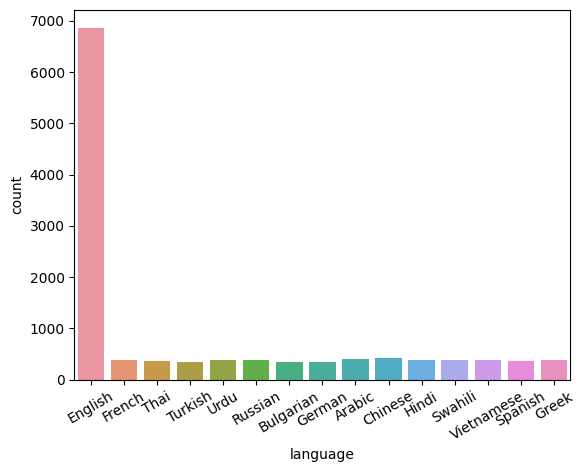

In [ ]:
sns.countplot(x =train["language"])
plotter.xticks(rotation = 30);

In [ ]:
labels, frequencies = np.unique(test.language.values, return_counts = True)

fig = px.pie(values=frequencies,
             names=labels,
             title='test : Languages distribution',
             color_discrete_sequence=px.colors.sequential.Plotly3)

fig.show()

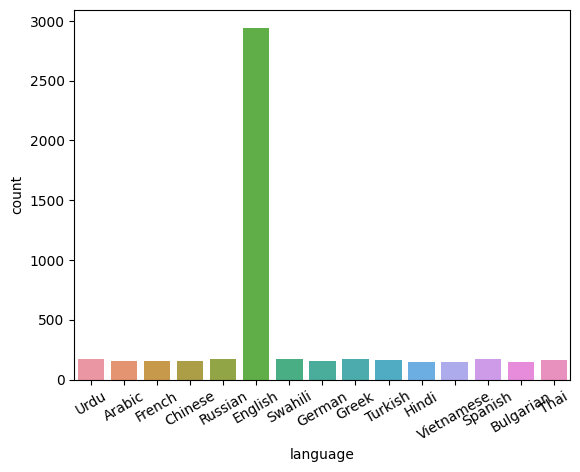

In [ ]:
sns.countplot(x =test["language"])
plotter.xticks(rotation = 30);

In [ ]:
labels, frequencies = np.unique(train.lang_abv.values, return_counts = True)

fig = px.pie(values=frequencies,
             names=labels,
             title='train : lang_abv distribution',
             color_discrete_sequence=px.colors.sequential.Plotly3)

fig.show()

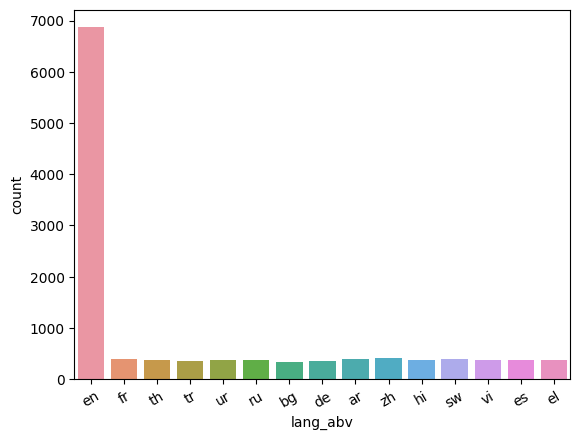

In [ ]:
sns.countplot(x =train["lang_abv"])
plotter.xticks(rotation = 30);

In [ ]:
labels, frequencies = np.unique(test.lang_abv.values, return_counts = True)

fig = px.pie(values=frequencies,
             names=labels,
             title='test : lang_abv distribution',
             color_discrete_sequence=px.colors.sequential.Plotly3)

fig.show()

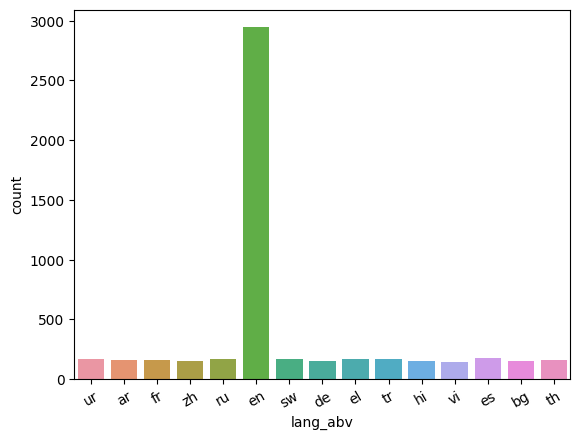

In [ ]:
sns.countplot(x =test["lang_abv"])
plotter.xticks(rotation = 30);

In [ ]:
labels, frequencies = np.unique(train.label.values, return_counts = True)

fig = px.pie(values=frequencies,
             names=labels,
             title='train : label distribution',
             color_discrete_sequence=px.colors.sequential.Plotly3)

fig.show()

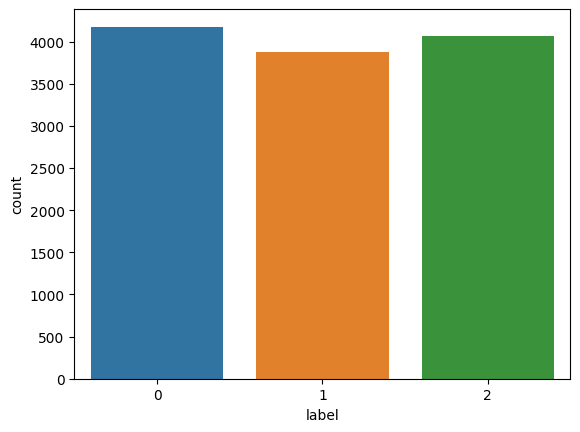

In [ ]:
sns.countplot(x =train["label"])
plotter.xticks(rotation = 0);

<Axes: xlabel='premise_text_length', ylabel='Count'>

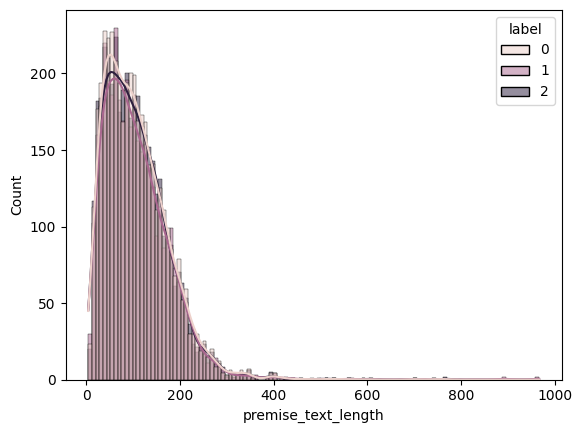

In [ ]:
train['premise_text_length'] = train['premise'].apply(len)
sns.histplot(train,x='premise_text_length',hue='label',kde=True)

<Axes: xlabel='hypothesis_text_length', ylabel='Count'>

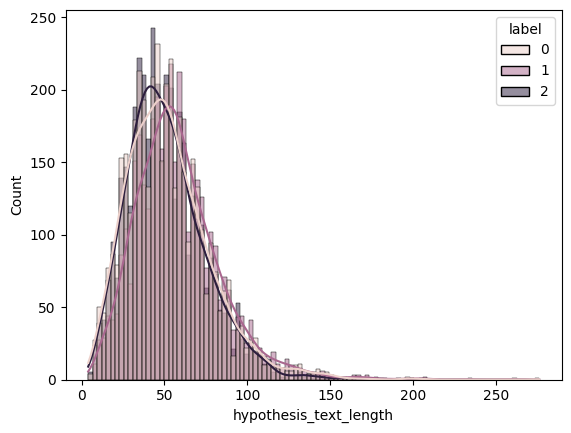

In [ ]:
train['hypothesis_text_length'] = train['hypothesis'].apply(len) #計算字元長度
sns.histplot(train,x='hypothesis_text_length',hue='label',kde=True)

In [ ]:
label_count = train['label'].value_counts().sort_index()
label_count

label
0    4176
1    3880
2    4064
Name: count, dtype: int64

In [ ]:
label_names = ['entailment', 'neutral', 'contradiction']
label_count.index = label_names
display(label_count)

fig = go.Figure([go.Bar(x=label_names, y=label_count, marker_color='skyblue')])

fig.update_layout(title_text='Number of entries per label',
                  xaxis_title_text='Label',
                  yaxis_title_text='Count',
                  )
fig.show()


entailment       4176
neutral          3880
contradiction    4064
Name: count, dtype: int64

In [ ]:
!pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.5 MB/s eta 0:00:00


In [ ]:
import evaluate
import torch
from transformers import AdamW, AutoTokenizer, AutoModelForSequenceClassification, DataCollatorWithPadding, TrainingArguments, Trainer

In [ ]:
model_name = 'symanto/xlm-roberta-base-snli-mnli-anli-xnli'
tokenizer = AutoTokenizer.from_pretrained(model_name) #

In [ ]:
# delete unnecessary columns
train = train.drop(labels=['language', 'lang_abv','premise_text_length', 'hypothesis_text_length'], axis=1)
test = test.drop(labels=['language','lang_abv'], axis=1)

In [ ]:
from datasets import Dataset, DatasetDict

In [ ]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(train, test_size=0.2, random_state=42)


train_ds = Dataset.from_pandas(train_df)
val_ds = Dataset.from_pandas(val_df)
test_ds = Dataset.from_pandas(test)

ds = DatasetDict()
ds['train'] = train_ds
ds['validation'] = val_ds
ds['test'] = test_ds

In [ ]:
def tokenizer_sentence(data):
    return tokenizer(data['premise'], data['hypothesis'], truncation=True)

In [ ]:
tokenized_ds = ds.map(tokenizer_sentence, batched=True)

  0%|          | 0/10 [00:00<?, ?ba/s]

  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/6 [00:00<?, ?ba/s]

In [ ]:
tokenized_ds

DatasetDict({
    train: Dataset({
        features: ['id', 'premise', 'hypothesis', 'label', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 9696
    })
    validation: Dataset({
        features: ['id', 'premise', 'hypothesis', 'label', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 2424
    })
    test: Dataset({
        features: ['id', 'premise', 'hypothesis', 'input_ids', 'attention_mask'],
        num_rows: 5195
    })
})

In [ ]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
import torch.nn as nn
from transformers import XLMRobertaModel

class CustomXLMRobertaModel(nn.Module):
    def __init__(self, num_labels):
        super(CustomXLMRobertaModel, self).__init__()
        model_name = 'symanto/xlm-roberta-base-snli-mnli-anli-xnli'
        self.roberta = XLMRobertaModel.from_pretrained(model_name)
        self.dropout = nn.Dropout(0.2)
        self.classifier = nn.Sequential(
            nn.Linear(768, 512),
            nn.LayerNorm(512),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(512, num_labels)
        )
        self.loss = nn.CrossEntropyLoss()
        self.num_labels = num_labels

    def forward(self, input_ids, attention_mask, labels=None):
        output = self.roberta(input_ids=input_ids, attention_mask=attention_mask)
        output = self.dropout(output.pooler_output)
        logits = self.classifier(output)

        if labels is not None:
            loss = self.loss(logits.view(-1, self.num_labels), labels.view(-1))
            return {"loss": loss, "logits": logits}
        else:
            return logits

In [ ]:
model = CustomXLMRobertaModel(num_labels=3)

Some weights of XLMRobertaModel were not initialized from the model checkpoint at symanto/xlm-roberta-base-snli-mnli-anli-xnli and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from sklearn.metrics import accuracy_score, f1_score
from datasets import load_metric

training_args = TrainingArguments("/content",
                                  optim="adamw_torch",
                                  num_train_epochs=10,
                                  evaluation_strategy="epoch",
                                  logging_dir='./logs',
                                  logging_steps=10,
                                  learning_rate=1e-5,
                                report_to="none")

f1_metric = load_metric("f1")

def compute_metrics(eval_preds):
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    return {
        'accuracy': accuracy_score(labels, predictions),
        'f1': f1_metric.compute(predictions=predictions, references=labels, average="micro")
    }

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model,
    args=training_args,
    train_dataset=tokenized_ds["train"],
    eval_dataset=tokenized_ds["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

In [ ]:
!pip install wandb

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [ ]:
import os
os.environ["WANDB_DISABLED"] = "false"

In [ ]:
trainer.train()

You're using a XLMRobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.251800,0.424477,0.882013,{'f1': 0.8820132013201321}
2,0.465500,0.596218,0.886551,{'f1': 0.8865511551155115}
3,0.276000,0.691863,0.888614,{'f1': 0.8886138613861386}
4,0.112400,0.662306,0.889439,{'f1': 0.8894389438943895}
5,0.170200,0.779087,0.884901,{'f1': 0.8849009900990099}
6,0.002700,0.808814,0.886551,{'f1': 0.8865511551155115}
7,0.008300,0.866525,0.887376,{'f1': 0.8873762376237624}
8,0.000300,0.877350,0.886139,{'f1': 0.8861386138613861}
9,0.000300,0.916354,0.889026,{'f1': 0.889026402640264}
10,0.000200,0.925956,0.888614,{'f1': 0.8886138613861386}


TrainOutput(global_step=12120, training_loss=0.13425899787551243, metrics={'train_runtime': 1755.8109, 'train_samples_per_second': 55.222, 'train_steps_per_second': 6.903, 'total_flos': 0.0, 'train_loss': 0.13425899787551243, 'epoch': 10.0})

In [ ]:
predictions = trainer.predict(tokenized_ds["test"])
predictions

PredictionOutput(predictions=array([[-4.1079125, -3.9885616,  5.9147654],
       [-3.7906883,  5.8747015, -3.592221 ],
       [ 6.0134516, -3.7650602, -4.081677 ],
       ...,
       [ 6.0111866, -3.7586634, -4.0770516],
       [ 5.968717 , -3.6372294, -4.0760508],
       [-4.232057 , -3.863621 ,  5.911794 ]], dtype=float32), label_ids=None, metrics={'test_runtime': 15.6716, 'test_samples_per_second': 331.491, 'test_steps_per_second': 41.476})

In [ ]:
logits = torch.from_numpy(predictions.predictions)
probs = torch.softmax(logits, -1).tolist() # convert to probability
probs[:5]

[[4.437773168319836e-05, 5.0003305659629405e-05, 0.9999055862426758],
 [6.34327152511105e-05, 0.9998592138290405, 7.735823601251468e-05],
 [0.9999021291732788, 5.6650493206689134e-05, 4.127610009163618e-05],
 [6.493361433967948e-05, 0.9998598098754883, 7.525817636633292e-05],
 [6.565421062987298e-05, 0.9998574256896973, 7.68441241234541e-05]]

In [ ]:
outputs = []

for index, prob in enumerate(probs):

    predicted_label = prob.index(max(prob))
    element_id = ds['test']['id'][index]
    prediction = (element_id, predicted_label)
    outputs.append(prediction)

In [ ]:
submission = pd.read_csv("/kaggle/input/contradictory-my-dear-watson/sample_submission.csv")
submission

,id,prediction
0,c6d58c3f69,1
1,cefcc82292,1
2,e98005252c,1
3,58518c10ba,1
4,c32b0d16df,1
...,...,...
5190,5f90dd59b0,1
5191,f357a04e86,1
5192,1f0ea92118,1
5193,0407b48afb,1


In [ ]:
outputs = pd.DataFrame(outputs)
outputs

,0,1
0,c6d58c3f69,2
1,cefcc82292,1
2,e98005252c,0
3,58518c10ba,1
4,c32b0d16df,1
...,...,...
5190,5f90dd59b0,1
5191,f357a04e86,1
5192,1f0ea92118,0
5193,0407b48afb,0


In [ ]:
labels, frequencies = np.unique(outputs[1].values, return_counts = True)

fig = px.pie(values=frequencies,
             names=labels,
             title='train : label distribution',
             color_discrete_sequence=px.colors.sequential.Plotly3)

fig.show()

In [ ]:
submission['prediction']=outputs[1]
submission.to_csv("submission.csv", index=False)
submission

,id,prediction
0,c6d58c3f69,2
1,cefcc82292,1
2,e98005252c,0
3,58518c10ba,1
4,c32b0d16df,1
...,...,...
5190,5f90dd59b0,1
5191,f357a04e86,1
5192,1f0ea92118,0
5193,0407b48afb,0


In [ ]:
# Note: Much of this code was taken from a notebook by Guan Lin Tao on using the XLM-RoBERTa model.